In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
from lib import *
from pipeline_presets import *
from grid_search_presets import *

# Data Loading, Set Splitting Functions, Data Resampling

In [3]:
# Load
diabetes_df = pd.read_csv("data/diabetes.csv")
# Preview
display(diabetes_df.head())
display(diabetes_df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.897302,147.454335,70.914812,34.349127,1.883577,34.412522,0.648393,50.261729,1
1,1.101072,87.228809,67.057626,29.457914,0.000000,26.784201,0.356130,29.834140,0
2,7.939244,185.083876,66.054168,0.000000,0.000000,24.061055,0.663302,32.651592,1
3,0.855559,87.846161,66.187249,23.242126,89.726267,28.974094,0.176398,21.481908,0
4,0.000000,137.715755,39.183696,35.726182,177.446938,43.328373,2.335509,33.927286,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.851607,121.034601,69.124881,20.632400,80.865337,32.005044,0.471623,33.287770,0.348958
std,3.358411,32.133392,19.294297,15.864806,114.710197,7.872757,0.332260,11.782728,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036637,19.425593,0.000000
25%,1.042585,99.170912,62.865664,0.902628,0.000000,27.363929,0.241222,23.922459,0.000000
50%,2.975851,117.484187,71.626425,22.828627,31.852846,32.036785,0.371572,29.051297,0.000000
75%,6.061244,140.279716,79.362046,32.279551,127.675588,36.506122,0.623471,40.694005,1.000000
max,16.715548,200.031754,122.579531,100.423207,855.005651,66.980905,2.430805,80.889103,1.000000


In [4]:
def get_train_test_diabetes(
    diabetes_df,
    test_size=0.2,
    random_state=global_random_state,
    stratify=True,
    resample=True,
) -> tuple:
    """
    Returns a tuple of (X_train, X_test, y_train, y_test) for the diabetes dataset.
    """

    # Split the data into features and target variable
    X = diabetes_df.drop(columns=["Outcome"])
    y = diabetes_df["Outcome"]

    # Split the dataset into training and testing sets

    if stratify:
        return train_test_split(
            X, y, random_state=random_state, test_size=test_size, stratify=y
        )
    else:
        return train_test_split(X, y, random_state=random_state, test_size=0.2)

In [5]:
X_train, X_test, y_train, y_test = get_train_test_diabetes(
    diabetes_df,
    random_state=global_random_state,
    stratify=True,
    resample=True,
    test_size=0.2,
)

# Exploratory Data Analysis

## Pairplots

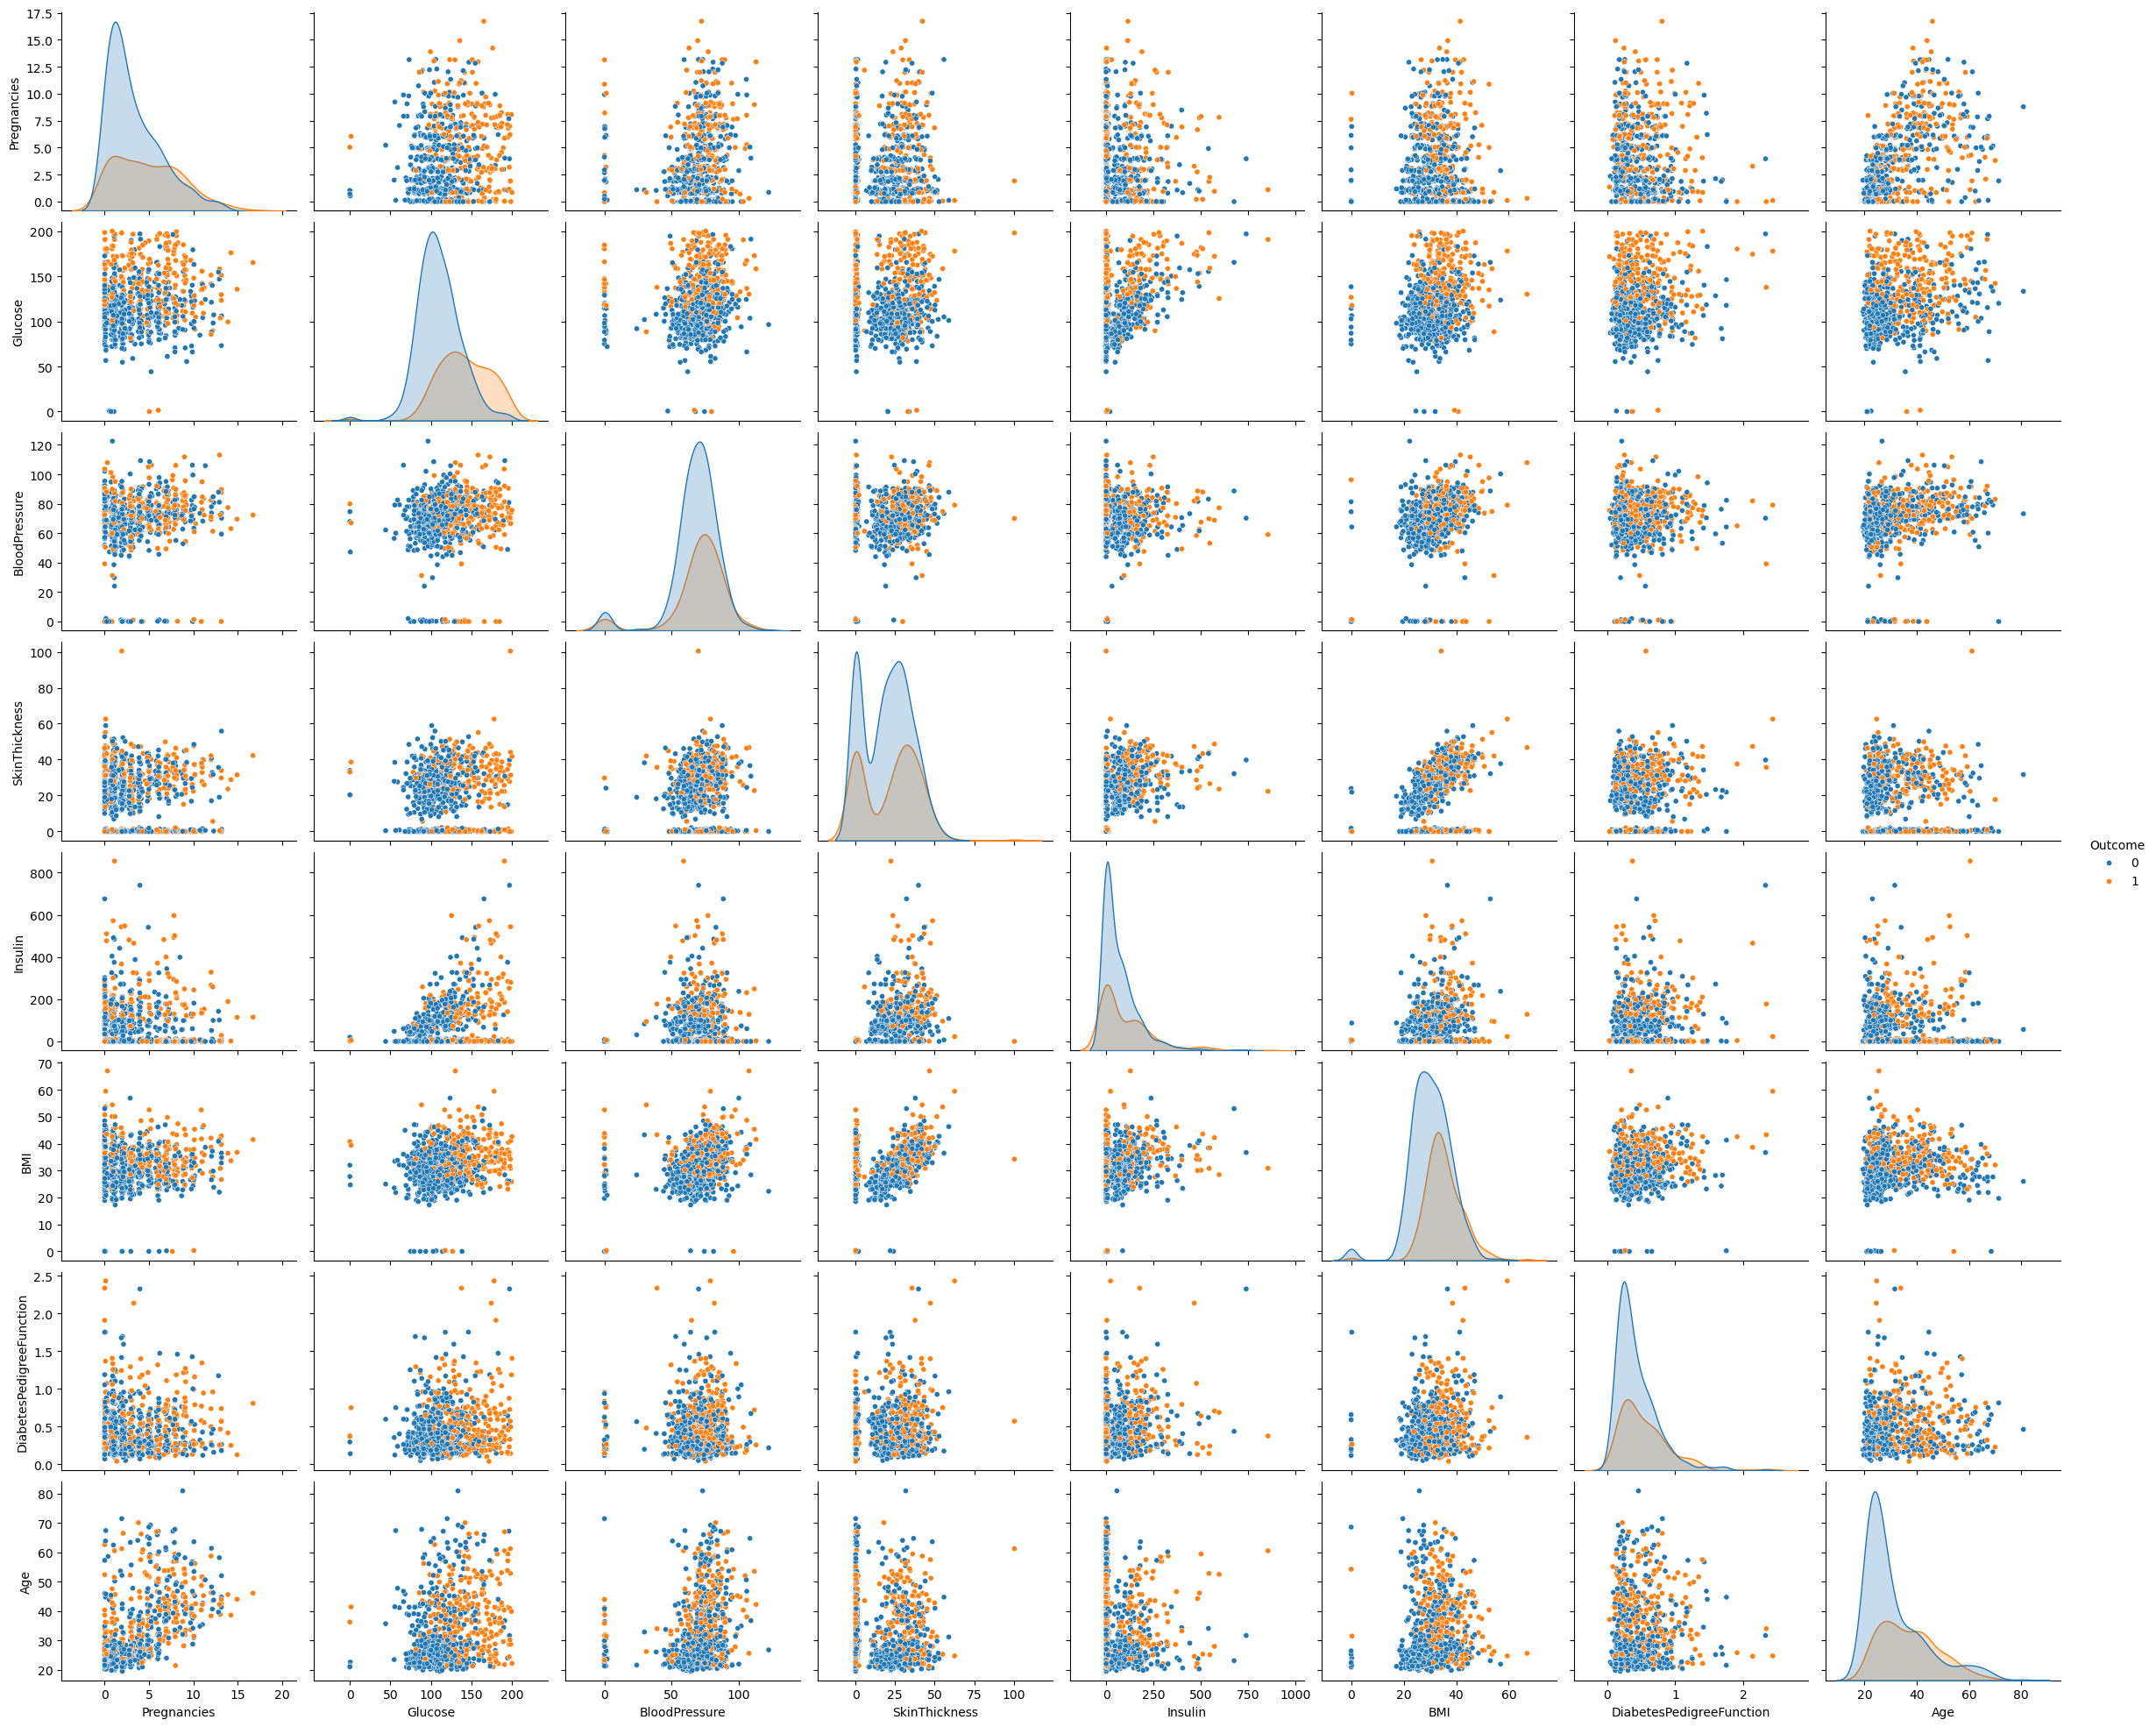

In [6]:
# Make pairplots between all features with the target variable being outcome
sns.pairplot(
    diabetes_df, hue="Outcome", markers="o", height=2.5, aspect=1.2, plot_kws={"s": 20}
)

## Correlation Plot

<Axes: >

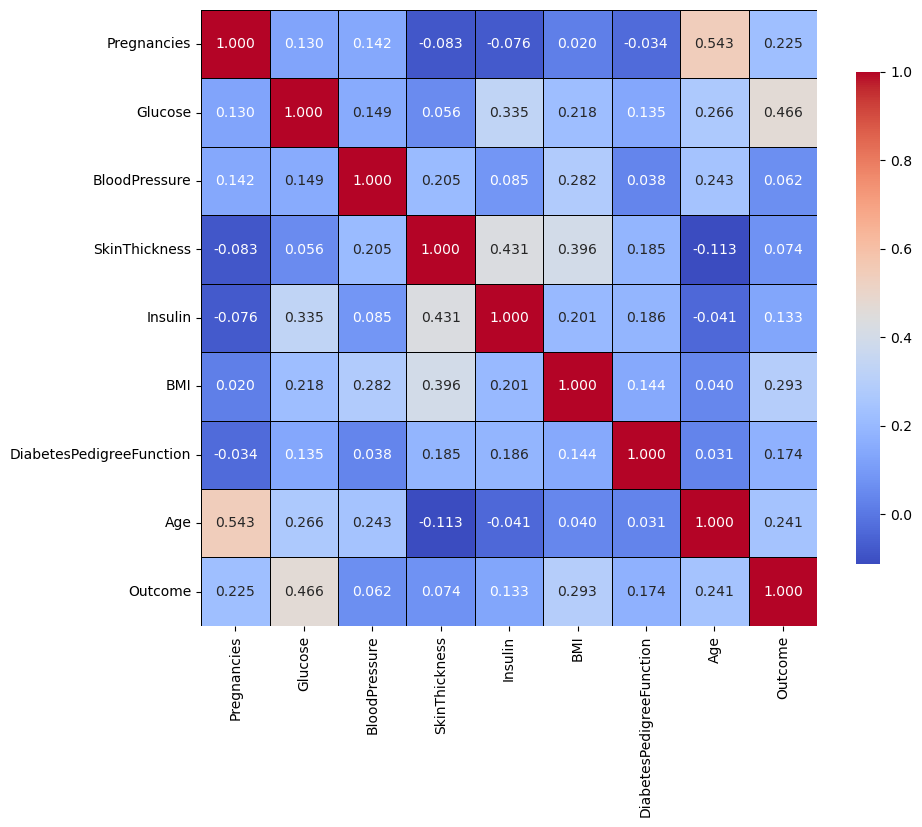

In [7]:
# Make a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    diabetes_df.corr(),
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10},
    linewidths=0.5,
    linecolor="black",
)

## Countplot

/var/folders/tp/3nd20r2x6ns2txnn5kmx15dr0000gn/T/ipykernel_23845/1559238358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=diabetes_df, palette="Set2")


<Axes: xlabel='Outcome', ylabel='count'>

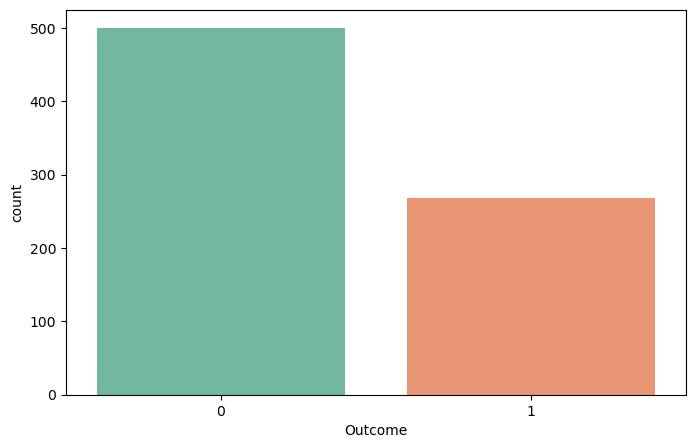

In [8]:
# Countplot of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x="Outcome", data=diabetes_df, palette="Set2")

## Feature Distribution Plots

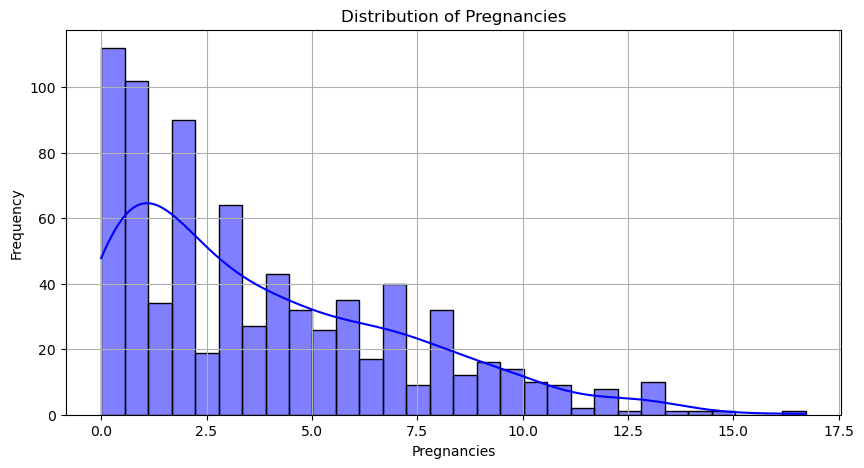

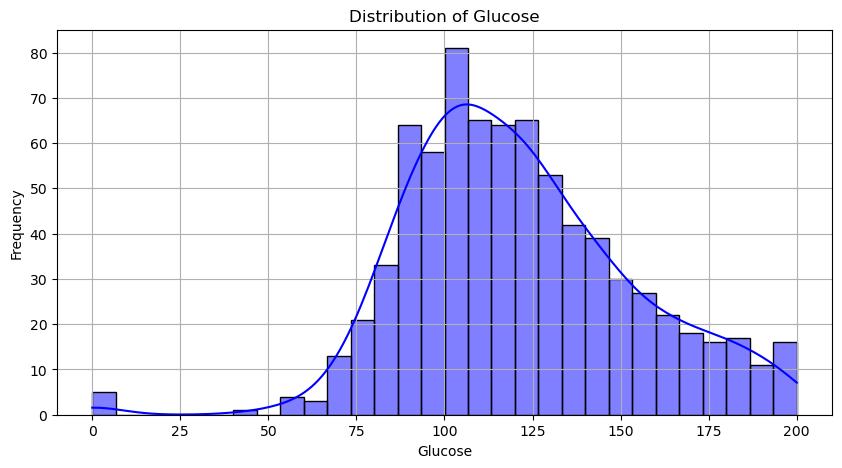

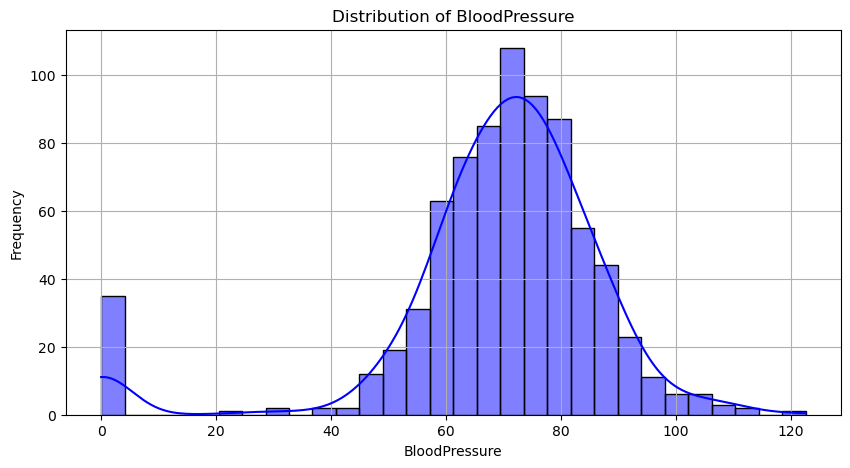

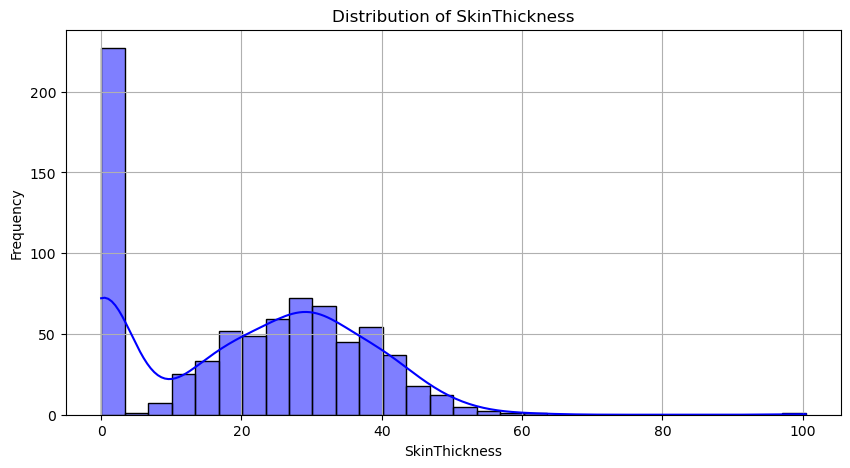

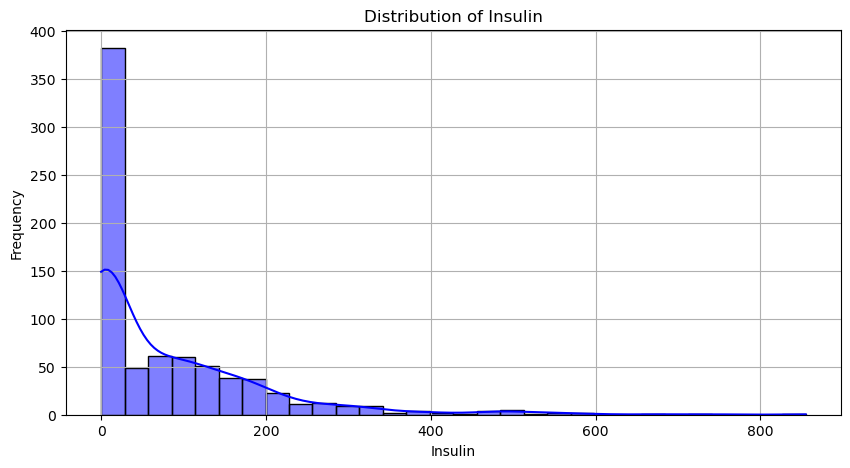

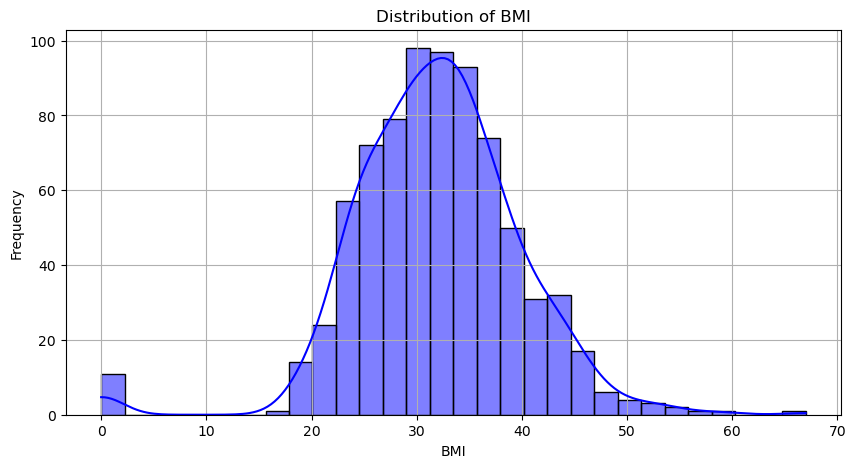

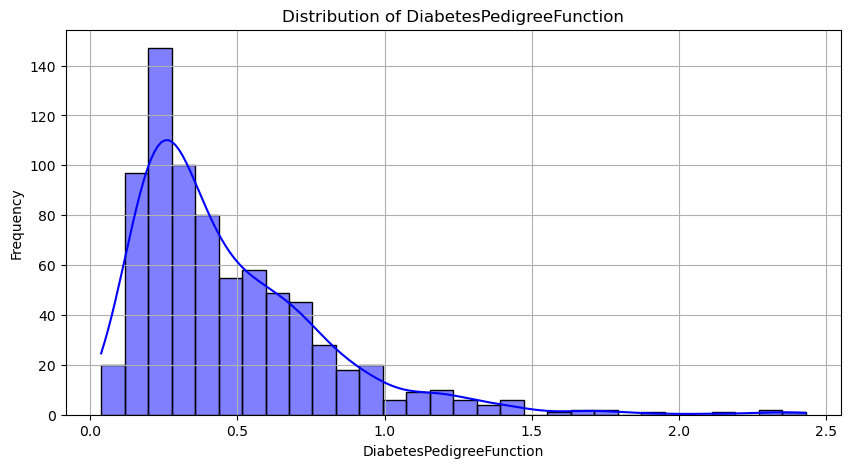

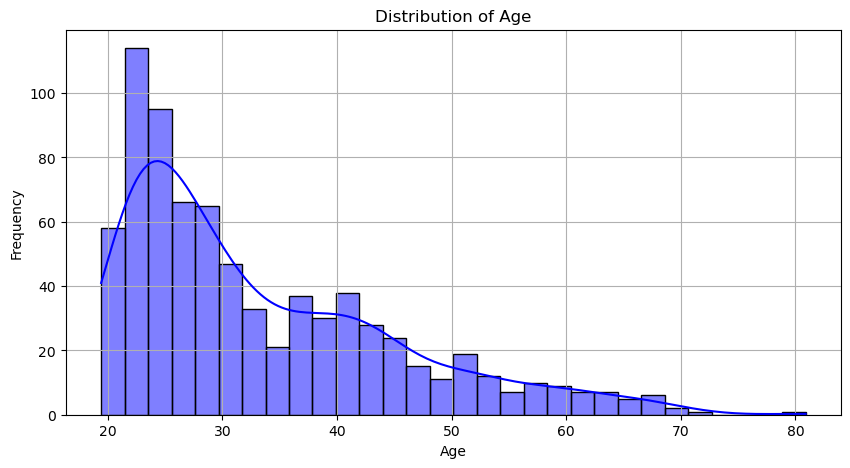

In [9]:
# Feature distribution plots
def plot_feature_distribution(df, feature):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


# Plot feature distributions for all features
for feature in diabetes_df.columns[:-1]:  # Exclude the target variable 'Outcome'
    plot_feature_distribution(diabetes_df, feature)

# Model Fitting and Scoring

### Preparation

In [10]:
def grid_search_preset(pipe_source, grid_search_source):
    prep_pipe = get_preprocessing_pipe(scaling=True, preprocessing="PCA")
    pipe = pipe_source(prep_pipe)
    prep_grid = get_preprocessing_grid_search(pipe)
    return grid_search_source(pipe, prep_grid, scoring="f1")

## KNN

In [11]:
grid_search = grid_search_preset(get_knn_pipe, get_knn_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("KNN Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best parameters and score
print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

knn_grid_search = grid_search

KNN Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       100
           1       0.55      0.65      0.59        54

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.69       154

Confusion Matrix:
[[71 29]
 [19 35]]
Best Parameters: {'KNN__algorithm': 'auto', 'KNN__n_neighbors': 5, 'KNN__weights': 'uniform', 'PCA__n_components': 4, 'PCA__random_state': 42, 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.6360514584713652


## Naive Bayes

In [12]:
grid_search = grid_search_preset(get_naive_bayes_pipe, get_naive_bayes_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Naive Bayes Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

naive_bayes_grid_search = grid_search

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       100
           1       0.58      0.70      0.63        54

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154

Confusion Matrix:
[[72 28]
 [16 38]]
Best Parameters: {'PCA__n_components': 5, 'PCA__random_state': 42, 'Scaler': None, 'clf': BernoulliNB(), 'clf__alpha': 0.5, 'clf__binarize': 0.0}
F1 Score of Best Model: 0.6551180257475784


## Logistic Regression

In [13]:
# "UserWarning: Setting penalty='None' will ignore the C and l1_ratio parameters"
# Repeated warnings coming from logreg grid search can be suppressed with this file
# Penalty=None is not supported for the liblinear solver, so 1/4 fail, but that's okay.
from remove_warnings import *

with suppress_stdout_stderr():
    warnings.filterwarnings("ignore", category=UserWarning)

    grid_search = grid_search_preset(get_log_reg_pipe, get_log_reg_grid_search)

    grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Logistic Regression Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

log_reg_grid_search = grid_search

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       100
           1       0.58      0.72      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

Confusion Matrix:
[[72 28]
 [15 39]]
Best Parameters: {'LogisticRegression__C': 0.01, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'lbfgs', 'PCA__n_components': 5, 'PCA__random_state': 42, 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.6495976882609631


# Decision Trees

In [14]:
grid_search = grid_search_preset(get_decision_tree_pipe, get_decision_tree_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Decision Tree Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

decision_tree_grid_search = grid_search

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       100
           1       0.58      0.91      0.71        54

    accuracy                           0.73       154
   macro avg       0.75      0.77      0.73       154
weighted avg       0.80      0.73      0.74       154

Confusion Matrix:
[[64 36]
 [ 5 49]]
Best Parameters: {'DecisionTree__criterion': 'entropy', 'DecisionTree__max_depth': 5, 'DecisionTree__min_samples_leaf': 4, 'DecisionTree__min_samples_split': 5, 'PCA__n_components': 5, 'PCA__random_state': 42, 'Scaler': None}
F1 Score of Best Model: 0.6385263383218313


# Support Vector Machines

### Linear Support Vector Machines (Faster: able to utilize larger grid search space)

In [15]:
grid_search = grid_search_preset(get_lin_svm_pipe, get_lin_svm_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print classification report for the best model
print("Linear SVM Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

linear_svm_grid_search = grid_search

Linear SVM Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       100
           1       0.58      0.63      0.60        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix:
[[75 25]
 [20 34]]
Best Parameters: {'PCA__n_components': 5, 'PCA__random_state': 42, 'SVM__C': 0.001, 'SVM__penalty': 'l1', 'Scaler': None}
F1 Score of Best Model: 0.6547560197362906


### Nonlinear / Kernel Support Vector Machines

In [16]:
grid_search = grid_search_preset(get_kernel_svm_pipe, get_kernel_svm_grid_search)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Kernel SVM Report:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Best Parameters:", best_params)
print("F1 Score of Best Model:", best_score)

kernel_svm_grid_search = grid_search

Kernel SVM Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       100
           1       0.55      0.78      0.65        54

    accuracy                           0.70       154
   macro avg       0.70      0.72      0.69       154
weighted avg       0.74      0.70      0.71       154

Confusion Matrix:
[[66 34]
 [12 42]]
Best Parameters: {'PCA__n_components': 5, 'PCA__random_state': 42, 'SVM__C': 1, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf', 'SVM__probability': False, 'Scaler': StandardScaler()}
F1 Score of Best Model: 0.6726011672275954


## Final Score Comparison

In [17]:
# Final score comparison
print("\n===Final F1 Score Comparison===\n")
print(f"KNN:{round(knn_grid_search.best_score_ * 100, 2)}%")
print(f"Naive Bayes:{round(naive_bayes_grid_search.best_score_ * 100, 2)}%")
print(f"Logistic Regression:{round(log_reg_grid_search.best_score_ * 100, 2)}%")
print(f"Decision Tree:{round(decision_tree_grid_search.best_score_ * 100, 2)}%")
print(f"Linear SVM:{round(linear_svm_grid_search.best_score_ * 100, 2)}%")
print(f"Kernel SVM:{round(kernel_svm_grid_search.best_score_ * 100, 2)}%")


===Final F1 Score Comparison===

KNN:63.61%
Naive Bayes:65.51%
Logistic Regression:64.96%
Decision Tree:63.85%
Linear SVM:65.48%
Kernel SVM:67.26%


# Time Reports for all training

In [18]:
print("=========KNN==========")
print_time_report(knn_grid_search)
print("=========Naive Bayes==========")
print_time_report(naive_bayes_grid_search)
print("=========Logistic Regression==========")
print_time_report(log_reg_grid_search)
print("=========Decision Tree==========")
print_time_report(decision_tree_grid_search)
print("=========Linear SVM==========")
print_time_report(linear_svm_grid_search)
print("=========Kernel SVM==========")
print_time_report(kernel_svm_grid_search)

=========KNN==========

=== Training Time by 'Scaler' ===
param_Scaler
StandardScaler()    0.004943
Name: mean_fit_time, dtype: float64

=== Training Time by 'PCA__n_components' ===
param_PCA__n_components
5    0.004408
2    0.004539
3    0.004551
4    0.004807
Name: mean_fit_time, dtype: float64

=== Training Time by 'PCA__random_state' ===
param_PCA__random_state
42    0.004577
Name: mean_fit_time, dtype: float64

=== Training Time by 'KNN__n_neighbors' ===
param_KNN__n_neighbors
7    0.004110
3    0.004412
9    0.004880
5    0.004904
Name: mean_fit_time, dtype: float64

=== Training Time by 'KNN__weights' ===
param_KNN__weights
uniform     0.004435
distance    0.004718
Name: mean_fit_time, dtype: float64

=== Training Time by 'KNN__algorithm' ===
param_KNN__algorithm
auto         0.004064
kd_tree      0.004080
ball_tree    0.004431
brute        0.005731
Name: mean_fit_time, dtype: float64
=========Naive Bayes==========

====== Training Time by Group 1 ======

=== Training Time by 'S